1. Загрузите набор данных по следующей ссылке: https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

2. Прочитайте содержимое набора данных с помощью pandas

In [39]:
print(df.to_string())

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
5      Male     189     104      3
6      Male     147      92      5
7      Male     154     111      5
8      Male     174      90      3
9    Female     169     103      4
10     Male     195      81      2
11   Female     159      80      4
12   Female     192     101      3
13     Male     155      51      2
14     Male     191      79      2
15   Female     153     107      5
16   Female     157     110      5
17     Male     140     129      5
18     Male     144     145      5
19     Male     172     139      5
20     Male     157     110      5
21   Female     153     149      5
22   Female     169      97      4
23     Male     185     139      5
24   Female     172      67      2
25   Female     151      64      3
26     Male     190      95      3
27     Male     187 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


3. Пожалуйста, проверьте, содержит ли набор данных Null значения, если да, удалите их.

In [40]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

4. Используйте 30% данных для тестирования, а остальные для обучения

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

X = df[['Gender','Height','Weight']].values
y = df[['Index']].values

le_gender = LabelEncoder()
le_gender.fit(['Male','Female'])
X[:,0] = le_gender.transform(X[:,0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

5. Создайте объекты дерева решений и случайного леса

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = RandomForestClassifier(max_depth=2, random_state=21)

6. Обучите эти модели с заданным набором данных

In [43]:
model.fit(X_train, y_train)
clf.fit(X_train, y_train)

C:\Users\Swift\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=2, random_state=21)

7. Протестируйте эти модели, используя заданный набор тестов.

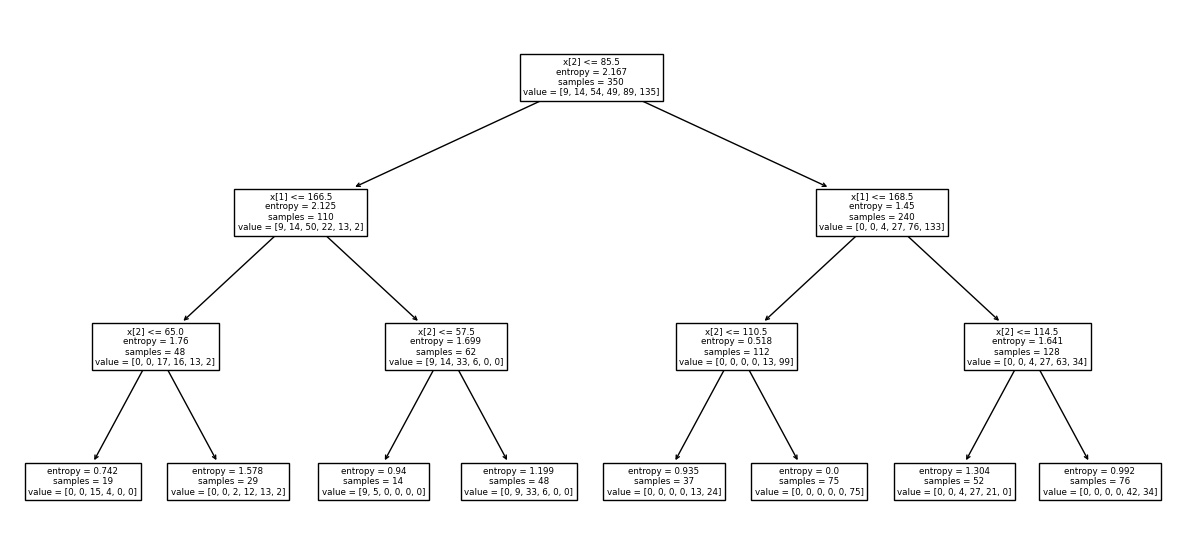

In [44]:
prediction1 = model.predict(X_test)
prediction2 = clf.predict(X_test)

plt.figure(figsize=(15,7))
plot_tree(model)
plt.show()

8. Рассчитайте точность для обеих моделей

In [45]:
from sklearn.metrics import accuracy_score

print(f"Accuracy for DTS:{accuracy_score(y_test, prediction1)}")
print(f"Accuracy for RFC:{accuracy_score(y_test, prediction2)}")

Accuracy for DTS:0.58
Accuracy for RFC:0.6
